<a href="https://colab.research.google.com/github/akgulhandan/MscThesis/blob/main/MyDissertation_284042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Owner

This code is written for a dissertation project to submit for University of Sussex.

Created by Handan AKGUL

# Download the data

In [ ]:
## Get the dataset to colab

!gdown 1A2O42qIXP0MTit5Cer6EH_51wyey9GfI


Downloading...
From: https://drive.google.com/uc?id=1A2O42qIXP0MTit5Cer6EH_51wyey9GfI
To: /content/credit_risk_dataset.csv
100% 1.80M/1.80M [00:00<00:00, 54.4MB/s]


# Read Data and Import Libraries

In [ ]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import os


# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'



import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read data
data_original =  pd.read_csv("credit_risk_dataset.csv")
data = pd.read_csv("credit_risk_dataset.csv")


# Print sample
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color': 'black','border-color': '#8b8c8c'})

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,27,40000,RENT,4.000000,DEBTCONSOLIDATION,B,4800,11.710000,0,0.120000,N,8
1,24,70000,OTHER,4.000000,PERSONAL,A,9000,9.630000,0,0.130000,N,2
2,25,33280,RENT,1.000000,PERSONAL,B,5500,nan,0,0.170000,N,2
3,34,37000,RENT,2.000000,MEDICAL,D,16000,12.990000,1,0.430000,Y,9
4,22,62000,MORTGAGE,5.000000,EDUCATION,B,9000,10.000000,0,0.150000,N,2
5,21,7200,RENT,0.000000,VENTURE,C,2500,13.110000,1,0.350000,N,3


In [ ]:
data.info() #checks the information of raw data columns for data type, Non-null counts etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Dealing with Duplicates, NaN and Missing Values


In [ ]:
data.isnull().sum() # shows the total null values for each column

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
# Let's count all duplicate rows
duplicate_row_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row_count}")

Number of duplicate rows: 165


In [ ]:
#Let's drop Nan Values and Duplicates:

# Step 1: Drop NaN values from the DataFrame
data = data.dropna()

# Step 2: Drop duplicate rows from the DataFrame
data = data.drop_duplicates()


data.reset_index(inplace = True)  #after cleaning, reseting index is a good strategy.

In [ ]:
#check the data after cleaning:

data.info()  ## 28501 non-null values in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28501 entries, 0 to 28500
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       28501 non-null  int64  
 1   person_age                  28501 non-null  int64  
 2   person_income               28501 non-null  int64  
 3   person_home_ownership       28501 non-null  object 
 4   person_emp_length           28501 non-null  float64
 5   loan_intent                 28501 non-null  object 
 6   loan_grade                  28501 non-null  object 
 7   loan_amnt                   28501 non-null  int64  
 8   loan_int_rate               28501 non-null  float64
 9   loan_status                 28501 non-null  int64  
 10  loan_percent_income         28501 non-null  float64
 11  cb_person_default_on_file   28501 non-null  object 
 12  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 13
Number of rows: 28501


# Exploratory Data or Data Preprocessing

In [ ]:
#let's check the our data's description: (only calculates the numeric columns)
data.describe()

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,16274.982562,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,9399.163655,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8122.000000,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16228.000000,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
#Lets check the corralation between columns :

data.corr(numeric_only=True)  #shows between the numeric columns.

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
index,1.000000,0.737122,0.168639,0.188156,0.103053,-0.000423,-0.062756,-0.066674,0.773999
person_age,0.737122,1.000000,0.178987,0.165624,0.054246,0.010170,-0.024091,-0.040782,0.859621
person_income,0.168639,0.178987,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622
person_emp_length,0.188156,0.165624,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486
loan_amnt,0.103053,0.054246,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334
loan_int_rate,-0.000423,0.010170,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562
loan_status,-0.062756,-0.024091,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559
loan_percent_income,-0.066674,-0.040782,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690
cb_person_cred_hist_length,0.773999,0.859621,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000


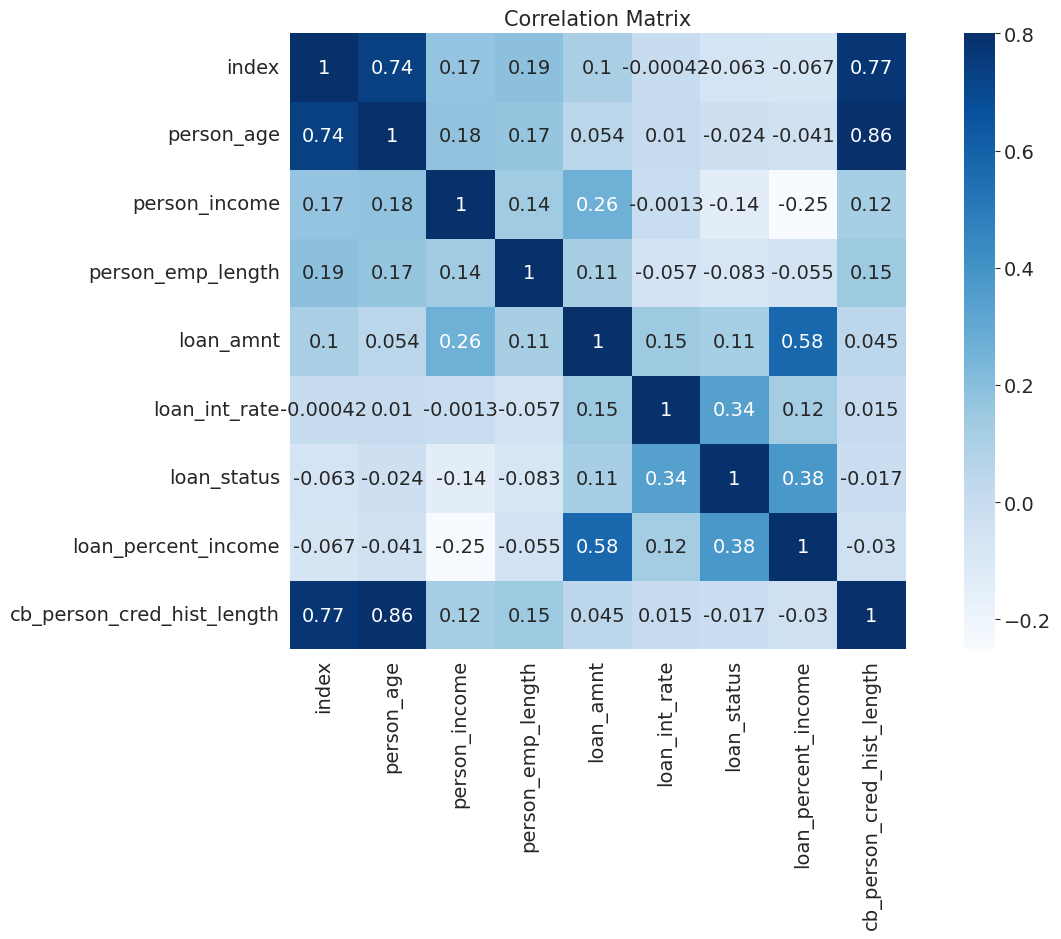

In [ ]:
#Let's create corralation matrix to see the relation on graph :

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(numeric_only=True), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Correlation Matrix',fontsize=15);

# Feature Description

person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual.

rent: The individual is currently renting a property.

mortgage: The individual has a mortgage on the property they own.

own: The individual owns their home outright.

other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.

A: The borrower has a high creditworthiness, indicating low risk.
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
C: The borrower's creditworthiness is moderate.
D: The borrower is considered to have higher risk compared to previous grades.
E: The borrower's creditworthiness is lower, indicating a higher risk.
F: The borrower poses a significant credit risk.
G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.

0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.

Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.
cb_preson_cred_hist_length: The length of credit history for the individual.

In [ ]:
data['loan_intent'].unique()  #shows the all type of loan intent among all the customers

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 15579
Age between 27 and 36: Number of people 10392
Age between 37 and 46: Number of people 2051
Age between 47 and 56: Number of people 371
Age between 57 and 66: Number of people 87


In [ ]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 1960
Income between 25001 and 50000: Number of people 10144
Income between 50001 and 75000: Number of people 8501
Income between 75001 and 100000: Number of people 4174
Income between 100001 and inf: Number of people 3722


In [ ]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 8139
Loan Amount between 5001 and 10000: Number of people 10565
Loan Amount between 10001 and 15000: Number of people 5399
Loan Amount between 15001 and inf: Number of people 4398


**Let's get some graphs for features and relations:**

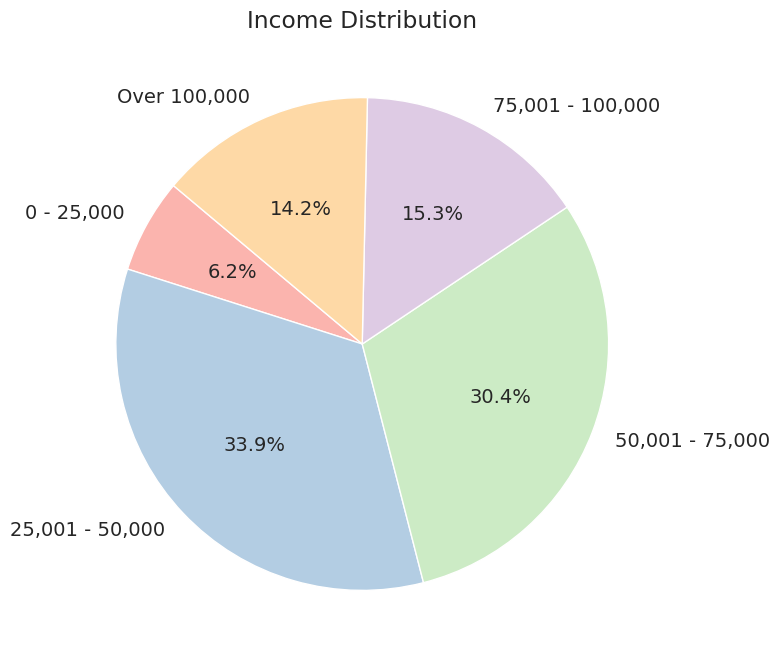

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the 'person_income' column.
# Replace 'data' with the actual name of your DataFrame.

# Define income ranges
income_ranges = [0, 25000, 50000, 75000, 100000, float('inf')]
labels = ['0 - 25,000', '25,001 - 50,000', '50,001 - 75,000', '75,001 - 100,000', 'Over 100,000']

# Calculate the number of people in each income range
counts = []
for i in range(len(income_ranges)-1):
    if i == len(income_ranges) - 2:
        # Include the upper boundary for the last range
        count = data['person_income'].between(income_ranges[i], income_ranges[i+1], inclusive="both").sum()
    else:
        count = data['person_income'].between(income_ranges[i], income_ranges[i+1], inclusive="left").sum()
    counts.append(count)

# Create a pie chart accordingly
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Income Distribution')
plt.show()

Target Distribution Ratio = Default/Non-Default: 0.2773271187200287


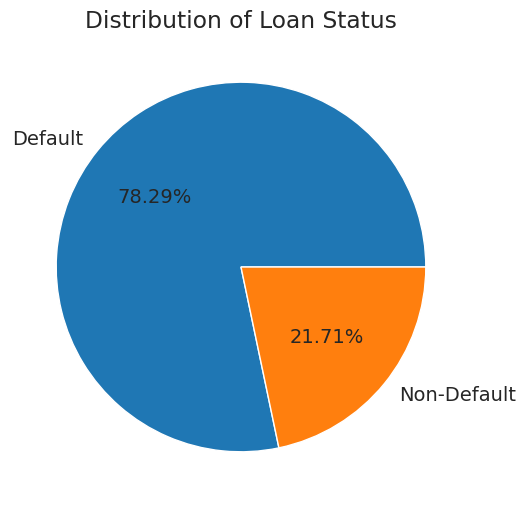

In [ ]:
# Since loan_status is our target, we need to understand the ratio between default and non-default
#0: Non-default
#1: Default

status = data['loan_status'].value_counts()
print("Target Distribution Ratio = Default/Non-Default:", status[1]/status[0])

plt.figure(figsize=(8, 6))
plt.pie(status, autopct='%.2f%%', labels=["Default", "Non-Default"])
plt.title('Distribution of Loan Status')
plt.show()

We can see from the figure above, our data is highly imbalanced.

In [ ]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [ ]:
data.loan_status.value_counts()  # this will be the our target. It will help to see if the customer would default or not.

# see the status of borrower(customer)
#loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
#0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
#1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
#still we have dirty data at this point

,count
loan_status,
0,22313
1,6188


In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming 'data' is your DataFrame and already imported and prepared

trace0 = go.Bar(
    x = data[data["loan_status"]== 1]["loan_grade"].value_counts().index.values,
    y = data[data["loan_status"]== 1]["loan_grade"].value_counts().values,
    name='Loan status = 1',
    marker=dict(color='#88c9a5')  # Setting the color for the first trace
)

# Second plot
trace1 = go.Bar(
    x = data[data["loan_status"]== 0]["loan_grade"].value_counts().index.values,
    y = data[data["loan_status"]== 0]["loan_grade"].value_counts().values,
    name="Loan status = 0",
    marker=dict(color='#81aab5')  # Setting the color for the second trace
)

data_trace = [trace0, trace1]

layout = go.Layout(
    title='Loan Grade Distribution by Status'
)

fig = go.Figure(data=data_trace, layout=layout)

# Plotting the figure inline in a Jupyter notebook; adjust if using a different environment
py.iplot(fig, filename='Loan grade')


In [ ]:
trace0 = go.Bar(
    x = data[data["loan_status"]== 1]["loan_intent"].value_counts().index.values,
    y = data[data["loan_status"]== 1]["loan_intent"].value_counts().values,
    name='Loan status = 1'
)

#Second plot
trace1 = go.Bar(
    x = data[data["loan_status"]== 0]["loan_intent"].value_counts().index.values,
    y = data[data["loan_status"]== 0]["loan_intent"].value_counts().values,
    name="Loan status = 0"
)

data_trace = [trace0, trace1]

layout = go.Layout(
    title='Loan Intent'
)


fig = go.Figure(data=data_trace, layout=layout)

py.iplot(fig, filename='Loan intent')

<BarContainer object of 57 artists>

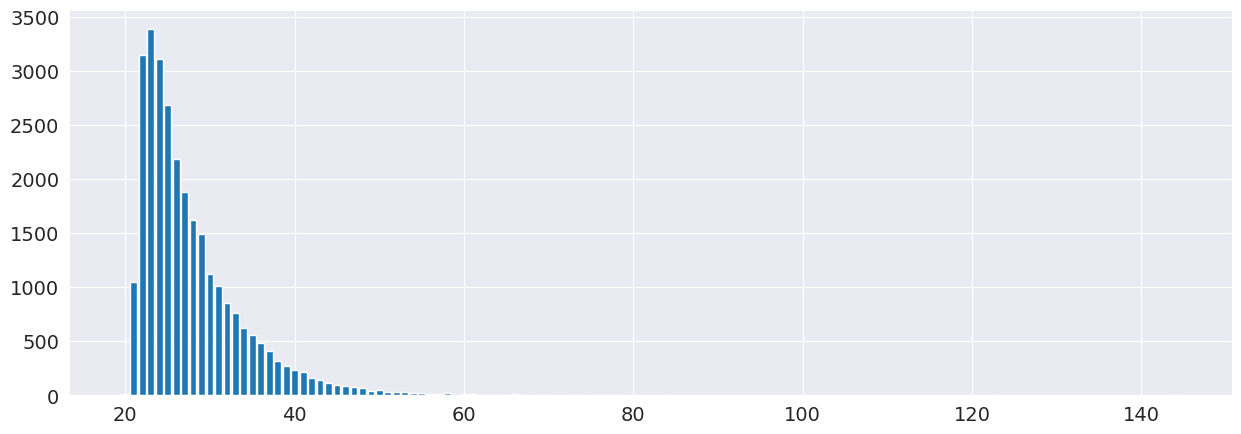

In [ ]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [ ]:
(data['person_age'].value_counts().values>90).sum()
# checking the total number of people who is older than 90 and it is 25, so it is safe to drop them when you compare to total number of customers.

25

# Feature Engineering

In [ ]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80
data.reset_index(inplace = True)  # reseting index

In [ ]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20_25', '26_35', '36_45', '46_55', '56_65'])

In [ ]:
data['age_group'].dtype #check the type of new column

CategoricalDtype(categories=['20_25', '26_35', '36_45', '46_55', '56_65'], ordered=True, categories_dtype=object)

In [ ]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low_middle', 'middle', 'high_middle', 'high'])

In [ ]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very_large'])

In [ ]:
data['person_emp_length'].max()

#person_emp_length: Employment length of the individual in years.

123.0

In [ ]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [ ]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)  ### drop the index column.


In [ ]:
data.head()

,level_0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20_25,low,small
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20_25,low,medium
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20_25,middle,very_large
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20_25,middle,very_large
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20_25,low,small


In [ ]:
data['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,14495
MORTGAGE,11732
OWN,2174
OTHER,93


In [ ]:
#Let's create some things that we will use

# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [ ]:
data.columns

Index(['level_0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [ ]:
raw_data = data.copy() #let's create a copy the data we managed to use it later.

In [ ]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [ ]:
data = data.drop(drop_colums, axis=1) #drop the named columns inside the drop_colums

In [ ]:
data.head()

,level_0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20_25,low,small,0.104167,0.005000,0.011140
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20_25,low,medium,0.572917,0.000182,0.002340
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20_25,middle,very_large,0.534351,0.000114,0.000435
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20_25,middle,very_large,0.643382,0.000229,0.000408
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20_25,low,small,0.252525,0.000800,0.002856


In [ ]:
data.isnull().sum()

,0
level_0,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0


In [ ]:
data= data.dropna()

In [ ]:
data.describe() ##final version of data

,level_0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
count,28464.000000,28464.000000,2.846400e+04,28464.000000,28464.000000,28464.000000,28464.000000,28464.000000,28464.000000,28464.000000,28464.000000,28464.000000
mean,14245.857645,27.700815,6.642180e+04,4.781338,9659.131710,11.045194,0.217222,0.169553,5.790753,0.169911,0.000766,0.001865
std,8222.033341,6.081119,5.151696e+04,4.031954,6328.326481,3.230899,0.412362,0.106391,4.016443,0.106669,0.001074,0.001865
min,1.000000,21.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.001282,0.000000,0.000200
25%,7125.750000,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.089286,0.000188,0.000792
50%,14248.500000,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.147059,0.000455,0.001273
75%,21366.250000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,0.228000,0.000941,0.002174
max,28500.000000,66.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,0.830000,0.021000,0.022820


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28464 entries, 0 to 28493
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   level_0                     28464 non-null  int64   
 1   person_age                  28464 non-null  int64   
 2   person_income               28464 non-null  int64   
 3   person_home_ownership       28464 non-null  object  
 4   person_emp_length           28464 non-null  float64 
 5   loan_intent                 28464 non-null  object  
 6   loan_grade                  28464 non-null  object  
 7   loan_amnt                   28464 non-null  int64   
 8   loan_int_rate               28464 non-null  float64 
 9   loan_status                 28464 non-null  int64   
 10  loan_percent_income         28464 non-null  float64 
 11  cb_person_default_on_file   28464 non-null  object  
 12  cb_person_cred_hist_length  28464 non-null  int64   
 13  age_group            

# Training & Test Samples + Label Encoding


In [ ]:
X = data.drop(['loan_status'], axis=1)  #to predict our target, we remove it from our main data first.
Y = data['loan_status'] # we assign target (loan_status) to Y value

In [ ]:
from sklearn.model_selection import train_test_split  #train_test_split is for creating our training and test samples.
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12) # we split our X and Y datasets from above cell in 80% to 20% percentages

In [ ]:
x_train.reset_index(inplace = True) #again reseting indexes because we have splitted above and need to arrange their index.
x_test.reset_index(inplace = True)

In [ ]:
print(x_train.shape,x_test.shape) # then we check the splitted data size as a matrix. shape is a method of Numpy library. First value is the number of samples, second value is the number of features

(22771, 19) (5693, 19)


In [ ]:
x_train.isnull().sum()
### there are sum null values because we created some new columns like age_group

,0
index,0
level_0,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0


In [ ]:
x_train.columns #check the column names of training samples

Index(['index', 'level_0', 'person_age', 'person_income',
       'person_home_ownership', 'person_emp_length', 'loan_intent',
       'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder  ## OneHotEncoder is a preprocessing tool used to convert categorical variables into
#a format that can be provided to machine learning algorithms to improve predictions, specifically by transforming them into one-hot encoded vectors.
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums]) # we use ohe_columns we defined above to convert

OneHotEncoder()

In [ ]:
ohe.categories_
##The categories_ attribute of the OneHotEncoder in sklearn contains a list of arrays,
##where each array holds the unique categories for each feature that was one-hot encoded. It essentially shows the distinct values found in each categorical feature after fitting the encoder.

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high_middle', 'low', 'low_middle', 'middle'], dtype=object),
 array(['20_25', '26_35', '36_45', '46_55', '56_65'], dtype=object),
 array(['large', 'medium', 'small', 'very_large'], dtype=object)]

In [ ]:
merge_ohe_col = np.concatenate((ohe.categories_[0],
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [ ]:
merge_ohe_col ### made it into one big array of categories

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high_middle', 'low',
       'low_middle', 'middle', '20_25', '26_35', '36_45', '46_55',
       '56_65', 'large', 'medium', 'small', 'very_large'], dtype=object)

In [ ]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)  # assign training samples to categories from merge_ohe_col
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col) # assign testing samples to categories from merge_ohe_col

In [ ]:
X_train_encoded  = pd.concat([ohe_data, x_train], axis=1) #create a new X_new by concatenating objects along a particular axis. The axis=1: specifies that the concatenation should be done column-wise
X_train_encoded  = X_train_encoded.drop(ohe_colums, axis=1)

In [ ]:
X_test_encoded  = pd.concat([ohe_data2, x_test], axis=1) #create a new X_train by concatenating objects
X_test_encoded  = X_test_encoded.drop(ohe_colums, axis=1)

In [ ]:
print(X_train_encoded.head())
X_train_encoded.shape

     N    Y    A    B    C    D    E    F    G  MORTGAGE  ...  person_age  \
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0       0.0  ...          26   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1.0  ...          31   
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       0.0  ...          51   
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0       0.0  ...          21   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0       1.0  ...          21   

   person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          39000                1.0      15000          16.07   
1          31323                6.0       2500          13.22   
2          37200                4.0       3000          10.62   
3          20004                2.0       3000          10.37   
4          87500                5.0      25000          13.98   

   loan_percent_income  cb_person_cred_hist_length  loan_to_income_ratio  \
0                 0.38                           4              0.3846

(22771, 45)

In [ ]:
X_test_encoded.head() #lets check the first rows of testing samples

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,27,63000,12.0,15500,14.65,0.25,5,0.246032,0.000774,0.000945
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,38,91200,0.0,9000,12.68,0.10,16,0.098684,0.000000,0.001409
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,24,75000,4.0,16000,12.42,0.21,2,0.213333,0.000250,0.000776
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,53000,9.0,8000,12.23,0.15,3,0.150943,0.001125,0.001529
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,14400,2.0,1200,7.14,0.08,3,0.083333,0.001667,0.005950


In [ ]:
X_test_encoded.columns

Index(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE', 'high', 'high_middle', 'low', 'low_middle',
       'middle', '20_25', '26_35', '36_45', '46_55', '56_65', 'large',
       'medium', 'small', 'very_large', 'index', 'level_0', 'person_age',
       'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

**Let's use SMOTE to get rid of our imbalance**

In [ ]:
pip install imbalanced-learn


In [ ]:
# Lets standadize our data before sampling

from sklearn.preprocessing import StandardScaler

# Define columns that need scaling
scale_cols = ['person_income', 'person_age', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
              'cb_person_cred_hist_length', 'loan_percent_income', 'loan_to_emp_length_ratio',
              'int_rate_to_loan_amt_ratio']

# Ensure that the scaling columns exist in the encoded datasets
scale_cols = [col for col in scale_cols if col in X_train_encoded.columns]

# Apply StandardScaler only to these columns
scaler = StandardScaler()
X_train_scaled_columns = scaler.fit_transform(X_train_encoded[scale_cols])
X_test_scaled_columns = scaler.transform(X_test_encoded[scale_cols])

# Create DataFrames from the scaled arrays
X_train_scaled_df = pd.DataFrame(X_train_scaled_columns, columns=scale_cols, index=X_train_encoded.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_columns, columns=scale_cols, index=X_test_encoded.index)

# Drop the original scale columns from the encoded datasets
X_train_final = X_train_encoded.drop(scale_cols, axis=1)
X_test_final = X_test_encoded.drop(scale_cols, axis=1)

# Concatenate the scaled columns back to the original DataFrame
X_train_final = pd.concat([X_train_final, X_train_scaled_df], axis=1)
X_test_final = pd.concat([X_test_final, X_test_scaled_df], axis=1)

# Now, X_train_final and y_train are ready for applying SMOTE

In [ ]:
print(X_test_final.shape[0],X_test_final.shape[1])
print(X_train_final.shape[0],X_train_final.shape[1])

5693 45
22771 45


New class distribution after SMOTE:
loan_status
1    17842
0    17842
Name: count, dtype: int64


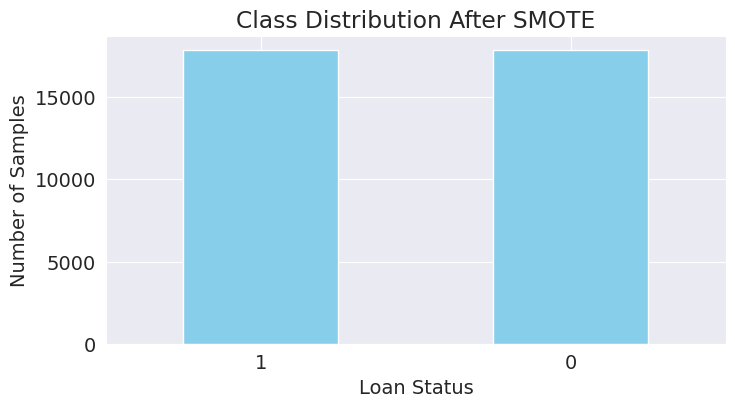

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=12)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)

# Check the new class distribution
print("New class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Optional: Plotting the new distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
y_train_smote.value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()



In [ ]:
X_train_smote.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,loan_to_income_ratio,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.384615,-0.542920,-0.279104,-0.935106,0.851326,1.556276,-0.443503,1.977624,-0.649131,-0.426650
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.079814,-0.696962,0.541847,0.308603,-1.130363,0.672674,-0.194943,-0.842852,1.522811,1.829356
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080645,-0.579038,3.825651,-0.188880,-1.051095,-0.133419,6.019068,-0.842852,0.529923,0.894139
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149970,-0.924082,-1.100055,-0.686364,-1.051095,-0.210928,-0.443503,-0.184741,-0.090632,0.849554
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.285714,0.430249,-1.100055,0.059861,2.436678,0.908301,-0.692064,1.131481,-0.525020,-0.700653


# ML Models Implementation

In [ ]:
pip install bayesian-optimization


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
#create the objects to call functions of each algorithms
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
lgb = lgb.LGBMClassifier()
gnb = GaussianNB()
cnb = ComplementNB()
mnb = MultinomialNB()
svc = SVC()

In [ ]:
# Define the dictionary with selected classifiers

clf = {
       'KNN': knc,
       'LR': lrc,
       'DT': dtc,
       'RF': rfc,
       'GN': gnb,
       'LGBM': lgb,
       'SVM' : svc
       }

   # 'NB': mnb 'GN' : gnb,

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
import time

def train_classifier(clf, X_train, y_train, X_test, y_test):
    start_time = time.time()  # Start the timer
    clf.fit(X_train, y_train)  # Train the model using the training set
    y_pred = clf.predict(X_test)  # Predict using the test set

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred, zero_division=0)  # Calculate precision
    recall = recall_score(y_test, y_pred, zero_division=0)  # Calculate recall

    # Calculate confusion matrix to get TN, FP, FN, TP for further metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity

    # Optionally, store and return the confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    end_time = time.time()  # End the timer
    elapsed_time = end_time - start_time  # Calculate elapsed time

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'elapsed_time': elapsed_time,
        'confusion_matrix': confusion
    }


# Usage
# accuracy, precision, recall, specificity = train_classifier(clf, x_train, y_train, X_test, y_test)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)

Name of the Algorithm:  KNN
Accuracy -  0.6397
Precision -  0.3171
Recall -  0.551
Specificity -  0.6648
Running time: 4.02 seconds


Confusion Matrix of the Algorithm
 [[2951 1488]
 [ 563  691]]


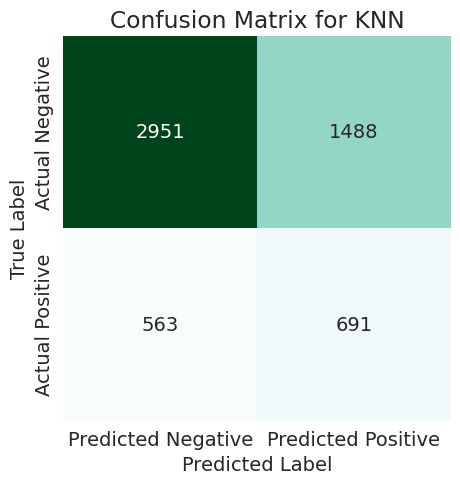

Name of the Algorithm:  LR
Accuracy -  0.8143
Precision -  0.5566
Recall -  0.7719
Specificity -  0.8263
Running time: 2.27 seconds


Confusion Matrix of the Algorithm
 [[3668  771]
 [ 286  968]]


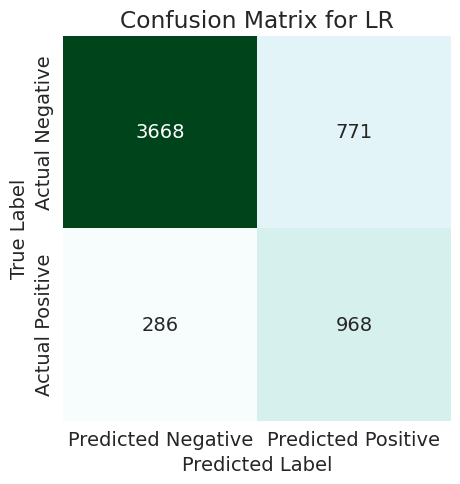

Name of the Algorithm:  DT
Accuracy -  0.8978
Precision -  0.7642
Recall -  0.7751
Specificity -  0.9324
Running time: 1.79 seconds


Confusion Matrix of the Algorithm
 [[4139  300]
 [ 282  972]]


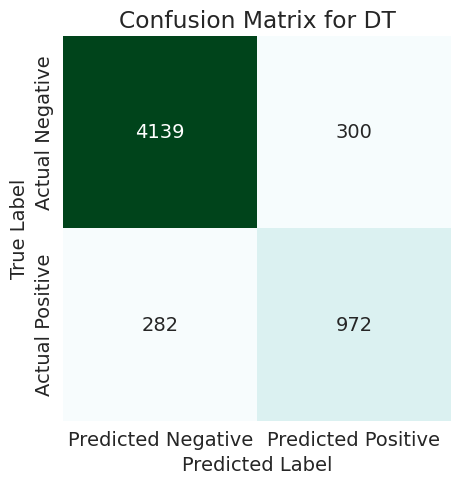

Name of the Algorithm:  RF
Accuracy -  0.9308
Precision -  0.9624
Recall -  0.7137
Specificity -  0.9921
Running time: 9.77 seconds


Confusion Matrix of the Algorithm
 [[4404   35]
 [ 359  895]]


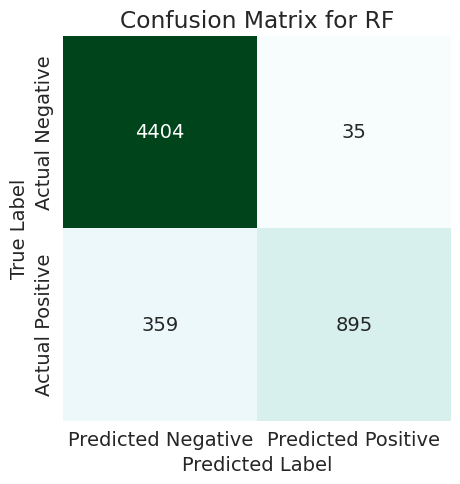

Name of the Algorithm:  GN
Accuracy -  0.7437
Precision -  0.4534
Recall -  0.7959
Specificity -  0.729
Running time: 0.10 seconds


Confusion Matrix of the Algorithm
 [[3236 1203]
 [ 256  998]]


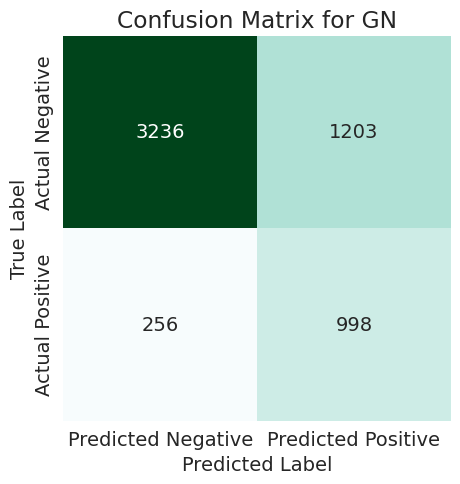

[LightGBM] [Info] Number of positive: 17842, number of negative: 17842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10426
[LightGBM] [Info] Number of data points in the train set: 35684, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Name of the Algorithm:  LGBM
Accuracy -  0.9394
Precision -  0.9871
Recall -  0.7344
Specificity -  0.9973
Running time: 1.98 seconds


Confusion Matrix of the Algorithm
 [[4427   12]
 [ 333  921]]


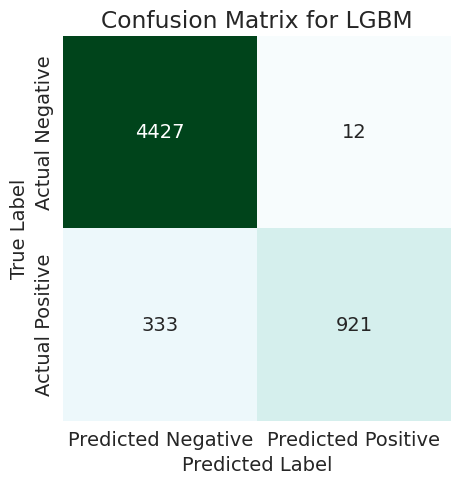

Name of the Algorithm:  SVM
Accuracy -  0.7437
Precision -  0.3311
Recall -  0.1603
Specificity -  0.9085
Running time: 185.37 seconds


Confusion Matrix of the Algorithm
 [[4033  406]
 [1053  201]]


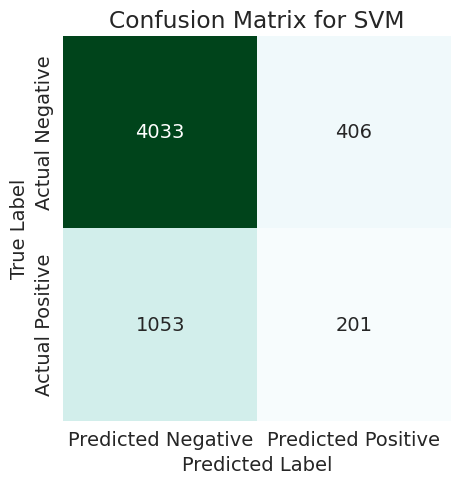

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# clf is a dictionary with classifiers from previous cells
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
models = []
timing = []

for name, classifier in clf.items():
    # Use the train_classifier function with the SMOTE-applied training data and original test data
    results = train_classifier(classifier, X_train_smote, y_train_smote, X_test_final, y_test)

    # Access results from the returned dictionary
    current_accuracy = results['accuracy']
    current_precision = results['precision']
    current_recall = results['recall']
    current_specificity = results['specificity']
    elapsed_time = results['elapsed_time']
    confusion = results['confusion_matrix']

    print("================================")
    print("Name of the Algorithm: ", name)
    print("Accuracy - ", current_accuracy.round(4))
    print("Precision - ", current_precision.round(4))
    print("Recall - ", current_recall.round(4))
    print("Specificity - ", current_specificity.round(4))
    print(f"Running time: {elapsed_time:.2f} seconds\n")

    # Confusion Matrix
    print("\nConfusion Matrix of the Algorithm\n", confusion)

    # Store the scores for further comparison or visualization
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    timing.append(elapsed_time)

    # Plot the confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='BuGn', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Hyperparameter Tuning for Each Algorithm

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
import logging
import lightgbm as lgb
import time

# Set the logger level for LightGBM to CRITICAL to suppress lesser messages
logging.getLogger('lightgbm').setLevel(logging.CRITICAL)

**Let's tune kNN**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hyperparameter tuning took 421.43 seconds.
Best Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'algorithm': 'brute'}
Best Recall Score: 0.87910565031084
Final k-NN Performance on Test Set:
Accuracy -  0.6989285086948884
Precision -  0.3797071129707113
Recall -  0.5789473684210527
Confusion Matrix:
 [[3253 1186]
 [ 528  726]]
Confusion Matrix:
 [[3253 1186]
 [ 528  726]]


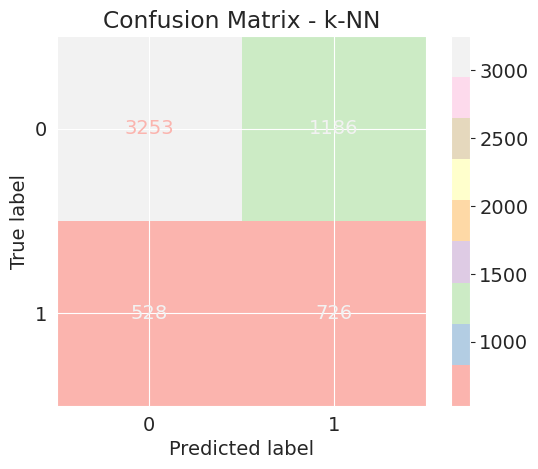

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the k-NN model
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': range(1, 31),         # Number of neighbors to use
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_knn = time.time()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid,
                                       n_iter=20, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters on the SMOTE-balanced training data
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_knn = time.time()
runtime_knn = end_time_knn - start_time_knn

# Print the runtime
print(f"Hyperparameter tuning took {runtime_knn:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions
best_knn = randomized_search.best_estimator_

# Evaluate on the test set using the original test data
y_pred = best_knn.predict(X_test_final)

# Calculate and print the final evaluation metrics
print("Final k-NN Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - k-NN")
plt.show()


**Let's tune Naive Bayes:**

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Hyperparameter tuning took 1.36 seconds.
Best Parameters: {'var_smoothing': 1e-08}
Best Recall Score: 0.8705862594741934
Final GaussianNB Performance on Test Set:
Accuracy -  0.6564201651150535
Precision -  0.37383177570093457
Recall -  0.8293460925039873
Confusion Matrix:
 [[2697 1742]
 [ 214 1040]]
Confusion Matrix:
 [[2697 1742]
 [ 214 1040]]


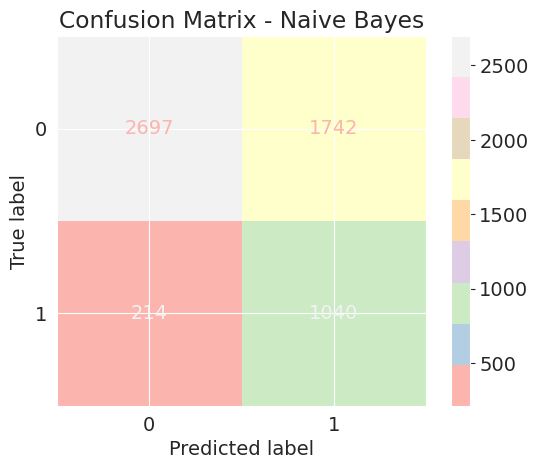

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes model
gnb = GaussianNB()

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Variance smoothing parameter
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_nb = time.time()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=gnb, param_distributions=param_grid,
                                       n_iter=6, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_nb = time.time()
runtime_nb = end_time_nb - start_time_nb

# Print the runtime
print(f"Hyperparameter tuning took {runtime_nb:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions
best_gnb = randomized_search.best_estimator_

# Evaluate on the test set
y_pred = best_gnb.predict(X_test_final)

# Calculate and print the final evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Final GaussianNB Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


**Let's tune LR**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hyperparameter tuning took 79.42 seconds.
Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 1}
Best Recall Score: 0.8181259988148318
Final Logistic Regression Performance on Test Set:
Accuracy -  0.8392763042332689
Precision -  0.6058713304184884
Recall -  0.773524720893142
Confusion Matrix:
 [[3808  631]
 [ 284  970]]
Confusion Matrix:
 [[3808  631]
 [ 284  970]]


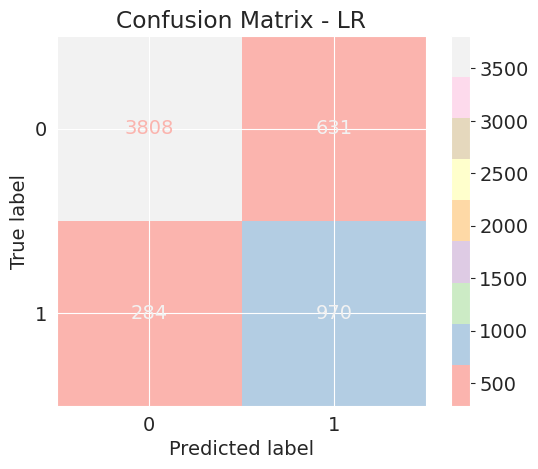

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Solver
    'max_iter': [100, 200, 300, 500]             # Maximum number of iterations
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_lr = time.time()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid,
                                       n_iter=20, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_lr = time.time()
runtime_lr = end_time_lr - start_time_lr

# Print the runtime
print(f"Hyperparameter tuning took {runtime_lr:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions
best_lr = randomized_search.best_estimator_

# Evaluate on the test set
y_pred = best_lr.predict(X_test_final)

# Calculate and print the final evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Final Logistic Regression Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - LR")
plt.show()

**Let's tune DT**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hyperparameter tuning took 10.45 seconds.
Best Parameters: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Best Recall Score: 0.9202444578156892
Final Decision Tree Performance on Test Set:
Accuracy -  0.91392938696645
Precision -  0.8453887884267631
Recall -  0.7456140350877193
Confusion Matrix:
 [[4268  171]
 [ 319  935]]
Confusion Matrix:
 [[4268  171]
 [ 319  935]]


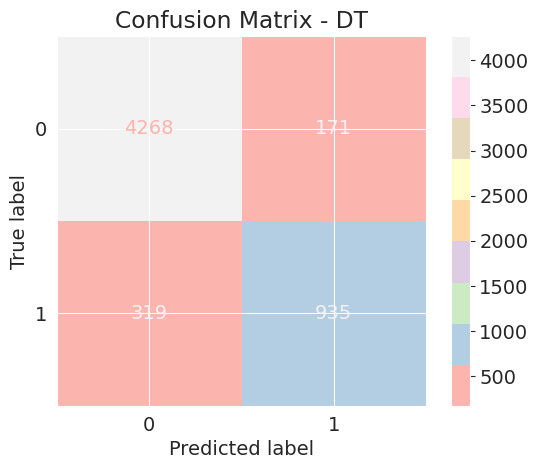

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],              # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],              # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],   # Number of features to consider for the best split
    'criterion': ['gini', 'entropy'],                 # Function to measure the quality of a split
    'splitter': ['best', 'random']                    # The strategy used to choose the split at each node
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_dt = time.time()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,
                                       n_iter=20, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_dt = time.time()
runtime_dt = end_time_dt - start_time_dt

# Print the runtime
print(f"Hyperparameter tuning took {runtime_dt:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions
best_dt = randomized_search.best_estimator_

# Evaluate on the test set
y_pred = best_dt.predict(X_test_final)

# Calculate and print the final evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Final Decision Tree Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - DT")
plt.show()


**Let's tune RF:**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Hyperparameter tuning took 2249.88 seconds.
Best Parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
Best Recall Score: 0.9224302171987956
Final Random Forest Performance on Test Set:
Accuracy -  0.9316704725101002
Precision -  0.9557428872497366
Recall -  0.7232854864433812
Confusion Matrix:
 [[4397   42]
 [ 347  907]]
Confusion Matrix:
 [[4397   42]
 [ 347  907]]


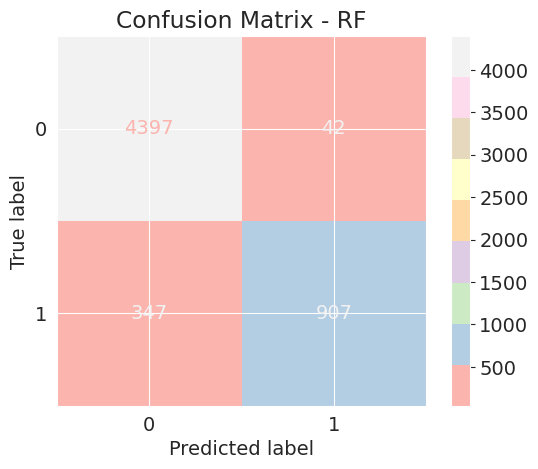

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 400, 800],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],                # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],                # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],     # Number of features to consider for the best split
    'bootstrap': [True, False]                          # Whether to bootstrap samples when building trees
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_rf = time.time()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                       n_iter=20, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters on the SMOTE-balanced training data
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_rf = time.time()
runtime_rf = end_time_rf - start_time_rf

# Print the runtime
print(f"Hyperparameter tuning took {runtime_rf:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions on the test set
best_rf = randomized_search.best_estimator_
y_pred = best_rf.predict(X_test_final)

# Calculate and print the final evaluation metrics
print("Final Random Forest Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - RF")
plt.show()

**Let's tune LightGBM :**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 17842, number of negative: 17842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10426
[LightGBM] [Info] Number of data points in the train set: 35684, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

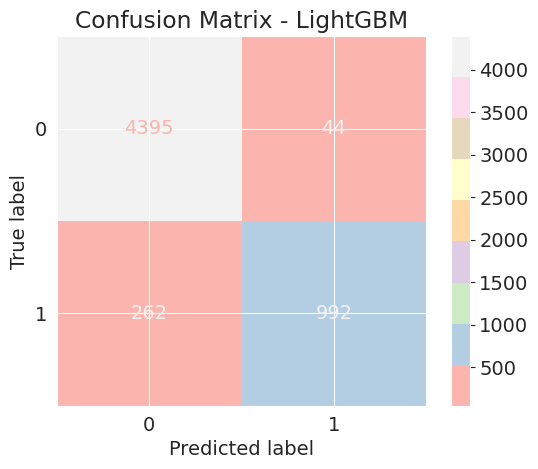

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier


# Define the LightGBM model
lgbm = LGBMClassifier()

# Define the parameter grid to search
param_grid = {
    'num_leaves': [31, 50, 70, 100],          # Maximum number of leaves in one tree
    'max_depth': [-1, 10, 20, 30],            # Maximum depth of the tree (-1 means no limit)
    'learning_rate': [0.001, 0.01, 0.1, 0.2], # Step size shrinkage
    'n_estimators': [100, 200, 500, 1000],    # Number of boosting rounds
    'min_child_weight': [1e-3, 1e-2, 0.1, 1], # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],             # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],      # Fraction of features used for training each tree
    'reg_alpha': [0, 0.01, 0.1, 1.0],         # L1 regularization term on weights
    'reg_lambda': [0, 0.01, 0.1, 1.0]         # L2 regularization term on weights
}

# Set up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_gbm = time.time()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid,
                                       n_iter=20, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters on the SMOTE-balanced training data
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_gbm = time.time()
runtime_gbm = end_time_gbm - start_time_gbm

# Print the runtime
print(f"Hyperparameter tuning took {runtime_gbm:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions on the test set
best_lgbm = randomized_search.best_estimator_
y_pred = best_lgbm.predict(X_test_final)

# Calculate and print the final evaluation metrics
print("Final LightGBM Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - LightGBM")
plt.show()

**Let's tune SVM :**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Hyperparameter tuning took 17819.55 seconds.
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Best Recall Score: 0.8828607719078114
Final SVM Performance on Test Set:
Accuracy -  0.780959072545231
Precision -  0.5026375282592314
Recall -  0.5318979266347688
Confusion Matrix:
 [[3779  660]
 [ 587  667]]
Confusion Matrix:
 [[3779  660]
 [ 587  667]]


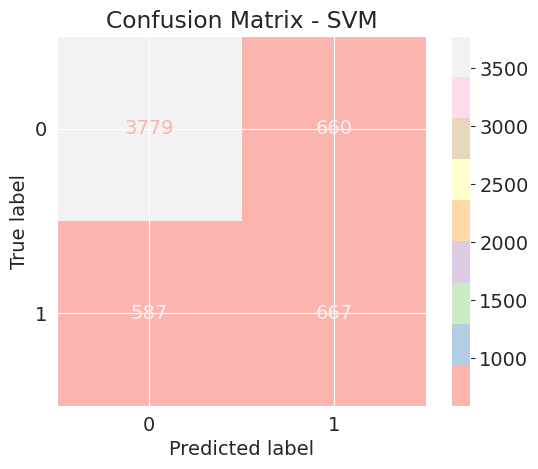

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC

# Define the SVM model
svc = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'gamma': ['scale', 0.01],         # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf'],      # Specifies the kernel type to be used in the algorithm
}

# Set up the cross-validation scheme with fewer folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Start the timer
start_time_svm = time.time()

# Initialize RandomizedSearchCV for faster hyperparameter tuning
randomized_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid,
                                       n_iter=10, scoring='recall', cv=cv, verbose=1, n_jobs=-1)

# Fit the model to find the best hyperparameters on the SMOTE-balanced training data
randomized_search.fit(X_train_smote, y_train_smote)

# Calculate the runtime
end_time_svm = time.time()
runtime_svm = end_time_svm - start_time_svm

# Print the runtime
print(f"Hyperparameter tuning took {runtime_svm:.2f} seconds.")

# Print out the best parameters and the corresponding score
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Recall Score: {randomized_search.best_score_}")

# Use the best model from RandomizedSearchCV to make predictions on the test set
best_svc = randomized_search.best_estimator_
y_pred = best_svc.predict(X_test_final)

# Calculate and print the final evaluation metrics
print("Final SVM Performance on Test Set:")
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))
print("Recall - ", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Pastel1)
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
import datetime
def show_time():
    current_time = datetime.datetime.now()
    print("Current time:", current_time.strftime("%Y-%m-%d %H:%M:%S"))

# Show time
show_time()

Current time: 2024-08-17 04:52:53
